In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

In [ ]:
import cv2
import os


In [ ]:
DATADIR="dataset"

CATEGORIES = ["covid", "normal"]

In [ ]:
%cd E:\6th Semester\Artificial Intelligence\Lab\Lab 9

E:\6th Semester\Artificial Intelligence\Lab\Lab 9


In [ ]:
data = []
label = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            #print(os.path.join(path, img))
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (64,64))
            data.append(new_array)
            label.append(class_num)
        except Exception as e:
            pass
                

In [ ]:
X = np.array(data, dtype="float") / 255.0
Y = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(70, 64, 64)

In [ ]:
X_test.shape

(24, 64, 64)

In [ ]:
Y_train.shape

(70,)

In [ ]:
Y_test.shape

(24,)

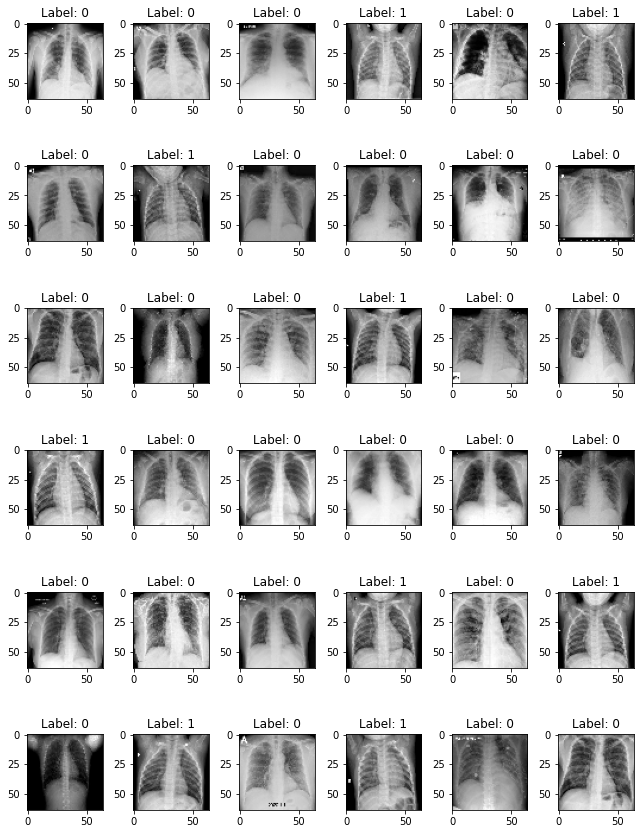

In [ ]:
# specify the number of rows and columns you want to see
num_row = 6
num_col = 6

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[1]

array([[0.        , 0.        , 0.        , ..., 0.0013687 , 0.00146098,
        0.00153787],
       [0.0002153 , 0.00027682, 0.0002153 , ..., 0.0016609 , 0.00163014,
        0.00173779],
       [0.00049212, 0.00056901, 0.0012303 , ..., 0.00189158, 0.0018762 ,
        0.0018762 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00299885, 0.00246059,
        0.00196847],
       [0.        , 0.        , 0.        , ..., 0.00296809, 0.00249135,
        0.00219915],
       [0.        , 0.        , 0.        , ..., 0.00295271, 0.00258362,
        0.00221453]])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
X = X_train.reshape(70,4096)
y = Y_train
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(3), random_state=1,max_iter = 3000)

clf.fit(X, y)
y_pred = clf.predict(X_test.reshape(24,4096))
#Importing Confusion Matrix
cm = confusion_matrix(y_pred, Y_test)
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9583333333333334


In [ ]:
X = X_train.reshape(70,4096)
y = Y_train
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(3), random_state=1,max_iter = 3000)

clf.fit(X, y)
y_pred = clf.predict(X_test.reshape(24,4096))
#Importing Confusion Matrix
cm = confusion_matrix(y_pred, Y_test)
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  1.0


In [ ]:
X = X_train.reshape(70,4096)
y = Y_train
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(2), random_state=1,max_iter = 1000)

clf.fit(X, y)
y_pred = clf.predict(X_test.reshape(24,4096))
#Importing Confusion Matrix
cm = confusion_matrix(y_pred, Y_test)
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8333333333333334


In [ ]:
X = X_train.reshape(70,4096)
y = Y_train
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(4), random_state=1,max_iter = 4000)

clf.fit(X, y)
y_pred = clf.predict(X_test.reshape(24,4096))
#Importing Confusion Matrix
cm = confusion_matrix(y_pred, Y_test)
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  1.0


In [ ]:
X = X_train.reshape(70,4096)
y = Y_train
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(1), random_state=1,max_iter = 200)

clf.fit(X, y)
y_pred = clf.predict(X_test.reshape(24,4096))
#Importing Confusion Matrix
cm = confusion_matrix(y_pred, Y_test)
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8333333333333334


In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements